<a href="https://colab.research.google.com/github/2303A52420/Exp-AI/blob/main/Exp_AI_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pandas numpy scikit-learn lime matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=59701fc19f533aac37ff83e35b5ea42f94293c6d87466575f2c1d288e142c75e
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import lime.lime_tabular
import matplotlib.pyplot as plt

# ------------------------------
# 1. Simulate a Dataset (Replace with real CSV if needed)
# ------------------------------
np.random.seed(0)
size = 500
data = {
    'PM2.5': np.random.normal(50, 15, size),
    'PM10': np.random.normal(80, 20, size),
    'NO2': np.random.normal(30, 10, size),
    'O3': np.random.normal(25, 7, size),
    'CO': np.random.normal(1.2, 0.3, size),
    'SO2': np.random.normal(12, 5, size),
}

df = pd.DataFrame(data)
df['AirQuality'] = np.where((df['PM2.5'] > 55) | (df['NO2'] > 35), 'unsafe', 'safe')

In [3]:
# 2. Prepare Data
# ------------------------------
X = df.drop('AirQuality', axis=1)
y = df['AirQuality'].map({'safe': 0, 'unsafe': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# 3. Train Model
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# 4. Apply LIME
# ------------------------------
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=X.columns,
    class_names=['safe', 'unsafe'],
    mode='classification',
    random_state=42
)

idx = 5  # Index of test sample to explain
exp = explainer.explain_instance(X_test_scaled[idx], model.predict_proba, num_features=5)

Q.NO:02

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries

# ------------------------------
# 1. Load MNIST
# ------------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[..., np.newaxis] / 255.0
x_test = x_test[..., np.newaxis] / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
# 2. Build and Train CNN
# ------------------------------
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_split=0.1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - accuracy: 0.8960 - loss: 0.3473 - val_accuracy: 0.9842 - val_loss: 0.0547
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9833 - loss: 0.0532 - val_accuracy: 0.9883 - val_loss: 0.0432
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.9892 - loss: 0.0333 - val_accuracy: 0.9892 - val_loss: 0.0376


In [10]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
from skimage.color import rgb2gray
from skimage.transform import resize
import numpy as np


# Helper: prediction function that accepts RGB images and converts to grayscale
def predict_grayscale(images):
    # Convert RGB to grayscale and resize to 28x28
    gray_images = np.array([resize(rgb2gray(img), (28, 28)) for img in images])
    gray_images = gray_images[..., np.newaxis]  # shape: (batch, 28, 28, 1)
    return model.predict(gray_images)

# Create LIME explainer
explainer = lime_image.LimeImageExplainer()

# Pick test image index
idx = 5

# Convert MNIST grayscale image to RGB (needed for LIME)
image = x_test[idx].reshape(28, 28)
image_rgb = np.stack([image] * 3, axis=-1)

# Generate explanation
explanation = explainer.explain_instance(
    image_rgb,
    predict_grayscale,
    top_labels=5,
    hide_color=0,
    num_samples=1000
)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


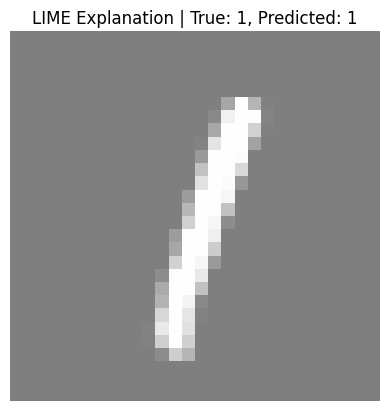

In [11]:
# 4. Visualize LIME Explanation
# ------------------------------
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=True,
    hide_rest=False
)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.title(f"LIME Explanation | True: {y_test[idx]}, Predicted: {model.predict(x_test[idx:idx+1]).argmax()}")
plt.axis('off')
plt.show()